In [129]:
# Abdul Saboor
# 20L-1113
# BDS-6A1

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## ADULT DATA SET

In [155]:
# reading the dataset and defining the column names
dataset = pd.read_csv('adult.csv')
dataset.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Exploratory Data Analysis

In [156]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [157]:
# defining the column names
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# replacing the column names
dataset.columns = columns

dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [158]:
# showing missing values
dataset.isnull().sum()

# No missing values so no processing required

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [159]:
# dropping the unnecessary columns
dataset.drop(['fnlwgt', 'education-num','relationship','capital-gain','capital-loss'], axis=1, inplace=True)
dataset.head()

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,White,Female,40,United-States,<=50K


In [160]:
# encode all columns to categorical except age and hours-per-week

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in dataset.columns:
    if column not in ['age','hours-per-week']:
        dataset[column] = le.fit_transform(dataset[column])
dataset.head()

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,50,6,9,2,4,4,1,13,39,0
1,38,4,11,0,6,4,1,40,39,0
2,53,4,1,2,6,2,1,40,39,0
3,28,4,9,2,10,2,0,40,5,0
4,37,4,12,2,4,4,0,40,39,0


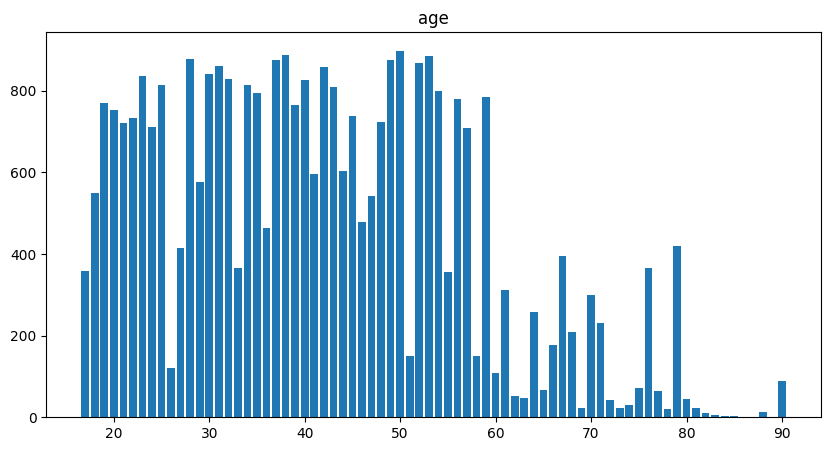

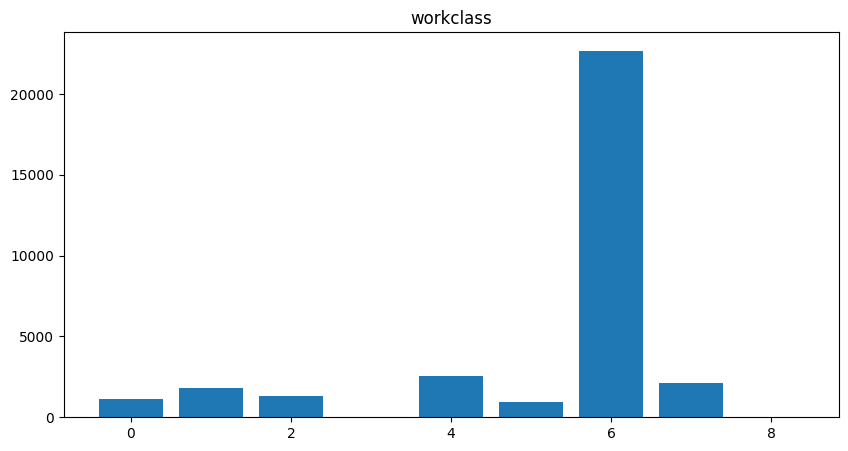

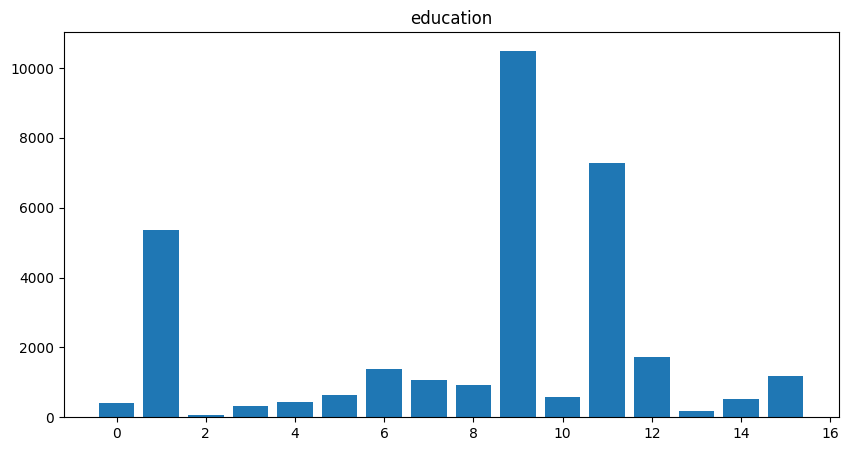

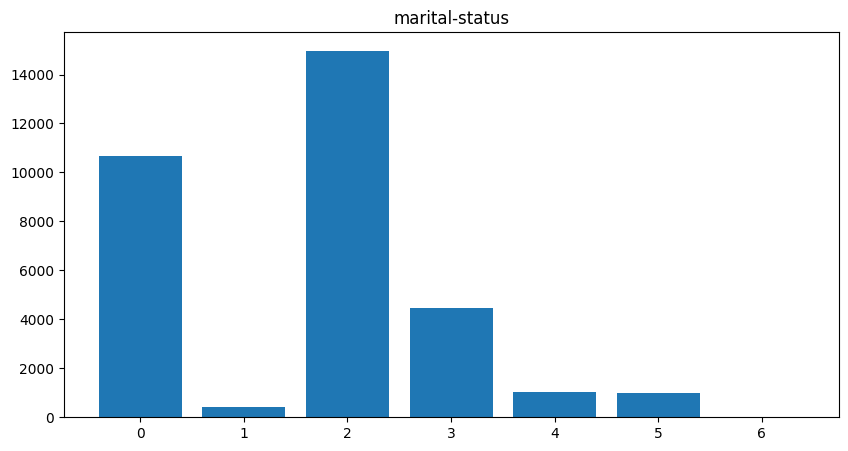

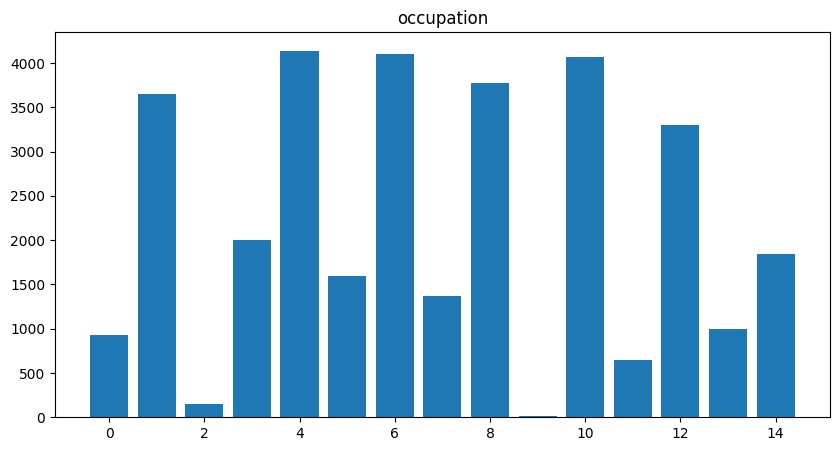

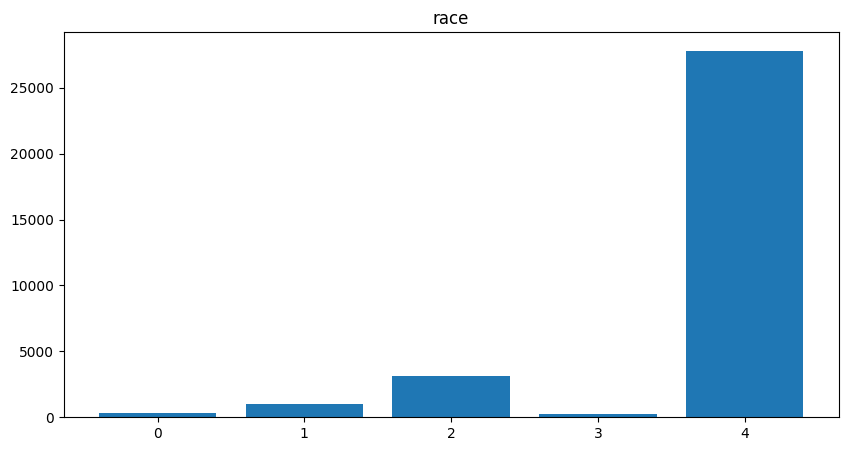

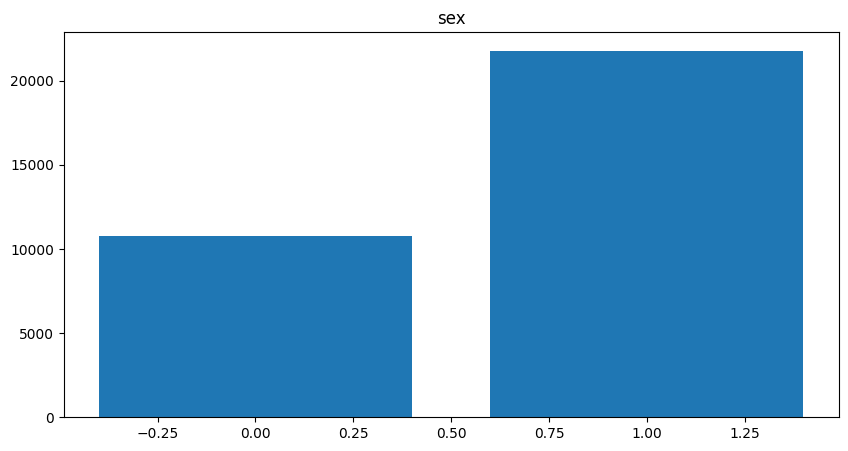

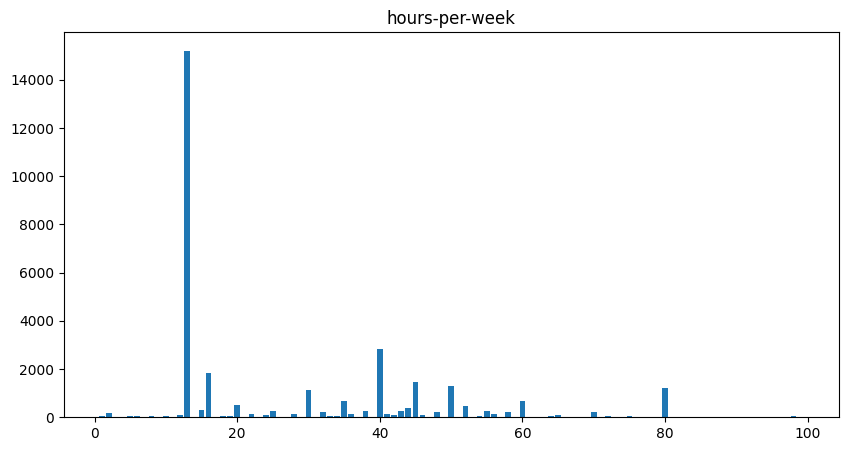

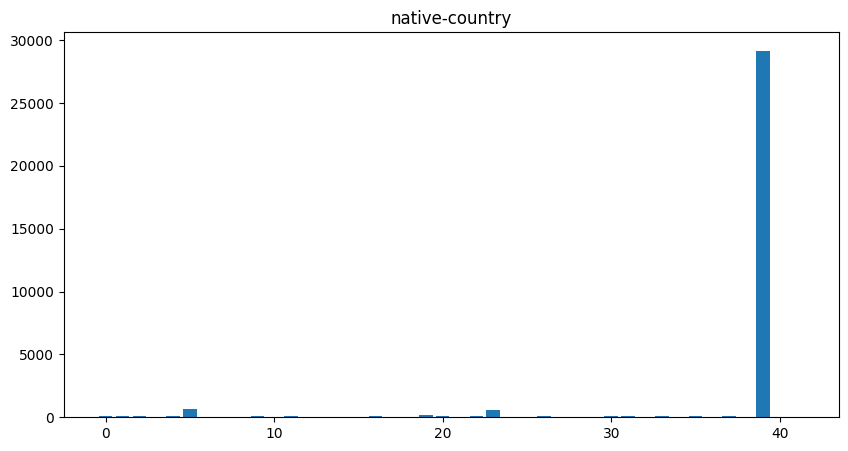

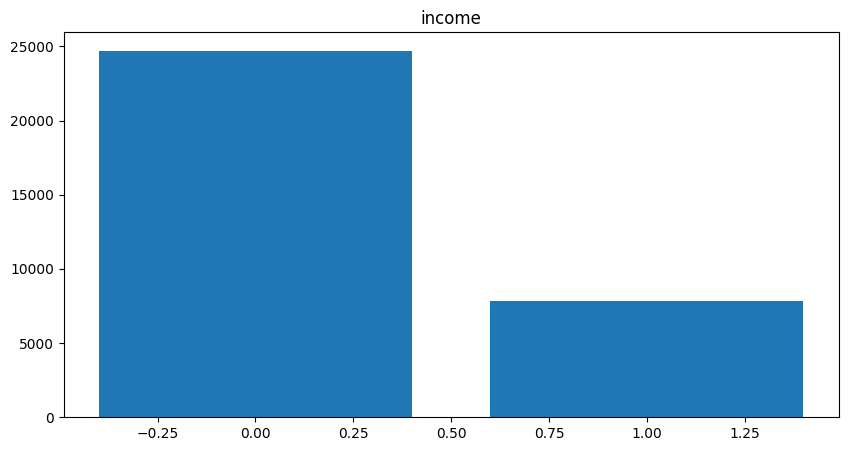

In [161]:
# bar plot of unique values in each column
for column in dataset.columns:
    plt.figure(figsize=(10,5))
    plt.bar(dataset[column].unique(), dataset[column].value_counts())
    plt.title(column)
    plt.show()


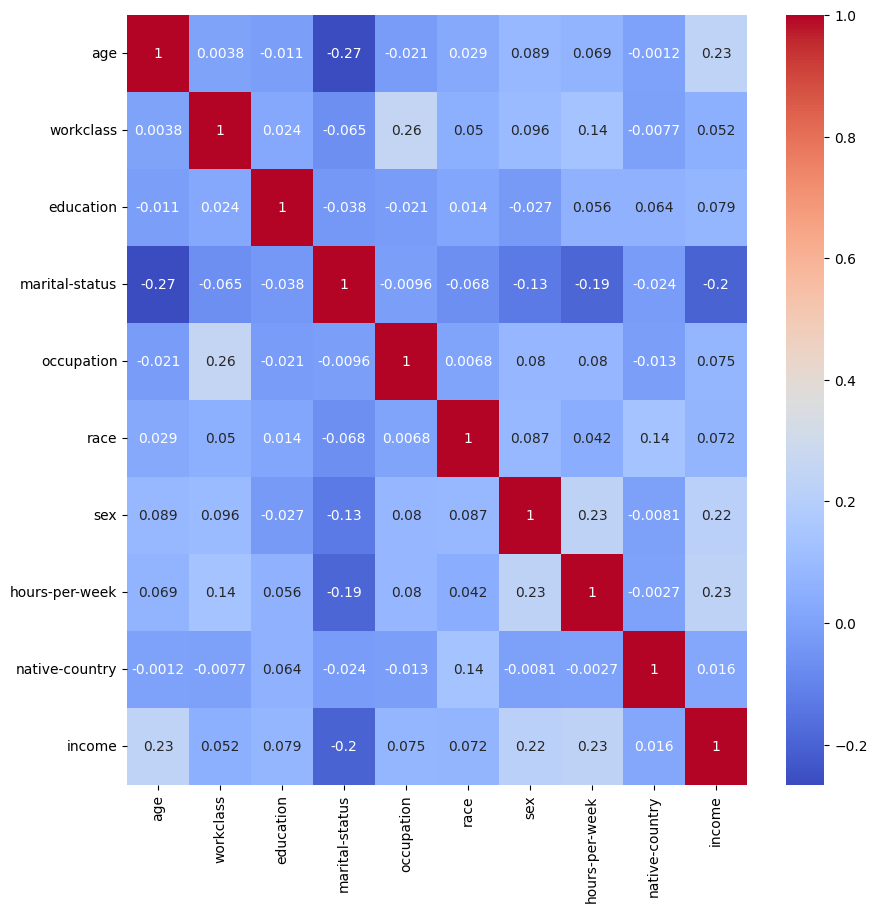

In [162]:
# heatmap of correlation
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

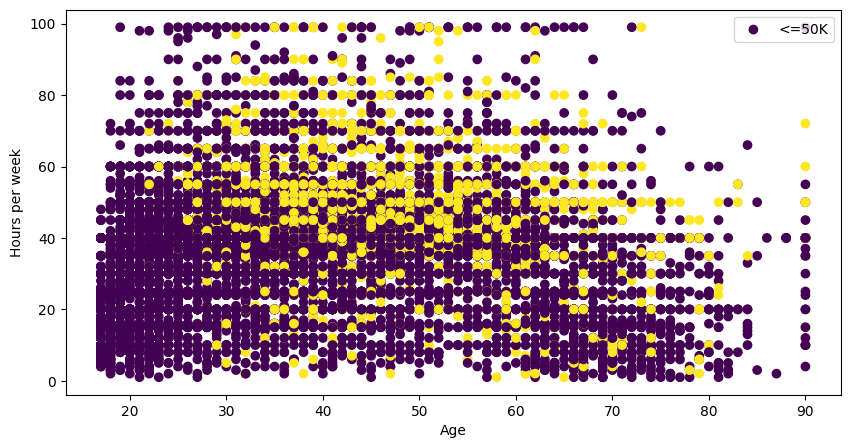

In [163]:
# scatter plot of age vs hours-per-week and income
plt.figure(figsize=(10,5))
plt.scatter(dataset['age'], dataset['hours-per-week'], c=dataset['income'])
plt.xlabel('Age')
plt.ylabel('Hours per week')
plt.legend(['<=50K', '>50K'])
plt.show()

In [164]:
# applying min-max normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset[['age','hours-per-week']] = scaler.fit_transform(dataset[['age','hours-per-week']])
dataset.head()

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country,income
0,0.452055,6,9,2,4,4,1,0.122449,39,0
1,0.287671,4,11,0,6,4,1,0.397959,39,0
2,0.493151,4,1,2,6,2,1,0.397959,39,0
3,0.150685,4,9,2,10,2,0,0.397959,5,0
4,0.273973,4,12,2,4,4,0,0.397959,39,0


### Naive Bayes Classifier

In [173]:
# applying naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = dataset.drop('income', axis=1)
y = dataset['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

nb = GaussianNB(priors=None, var_smoothing=0)
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.7791769041769042


In [142]:
# applying decision tree with optimal hyperparameters
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, min_samples_split=5)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.8108108108108109


# CANCER DATA SET

In [143]:
# reading the dataset and defining the column names
dataset = pd.read_csv('cancer_data.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Exploratory Data Analysis

In [144]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [145]:
# showing missing values
dataset.isnull().sum()

# No missing values so no processing required

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [146]:
# getting the correlation to drop the unnecessary columns
correlation = dataset.corr()
# print(correlation)

# dropping the unnecessary columns which have correlation less than -0.5 or greater than 0.5
dataset.drop(['id','perimeter_mean','radius_se','perimeter_se','area_se','radius_worst','perimeter_worst','area_worst'], axis=1, inplace=True)
dataset.head()

/var/folders/5f/1b1zms0j03d6wzq402h8fw8c0000gn/T/ipykernel_3789/1134056200.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataset.corr()


,diagnosis,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [147]:
# encode diagnosis column to categorical

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['diagnosis'] = le.fit_transform(dataset['diagnosis'])

dataset.head()

,diagnosis,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


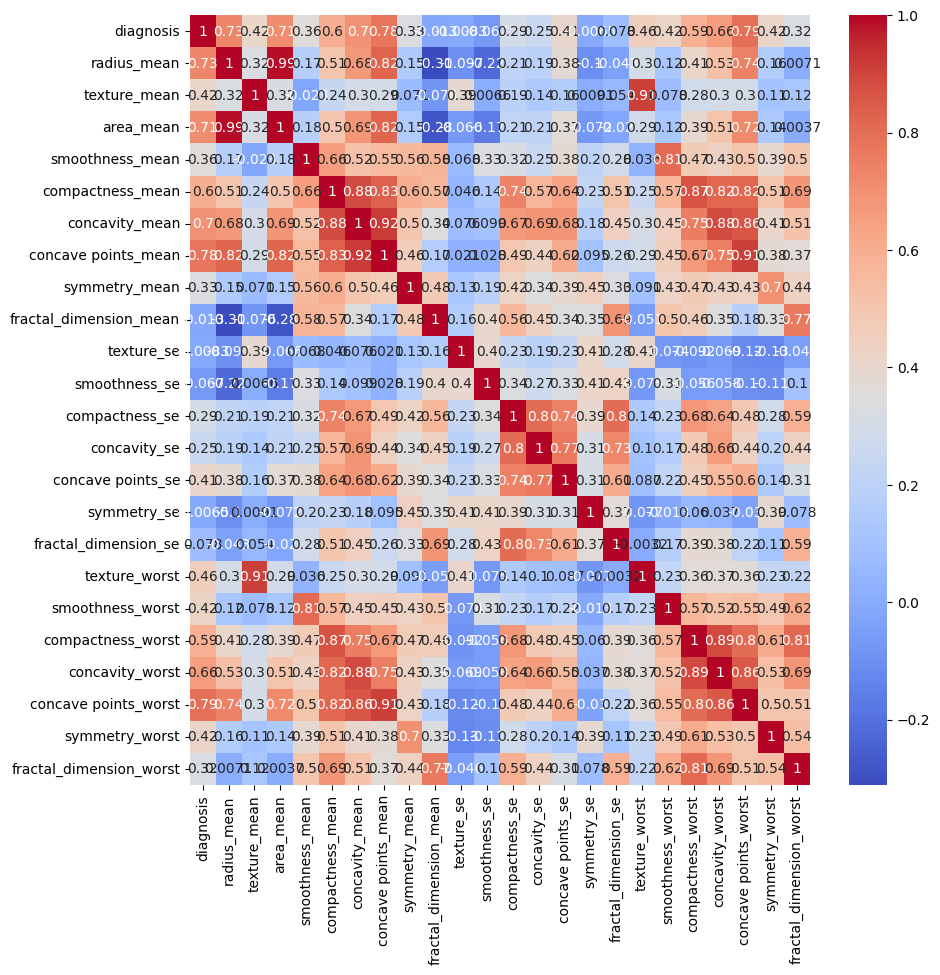

In [148]:
# heatmap of correlation
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

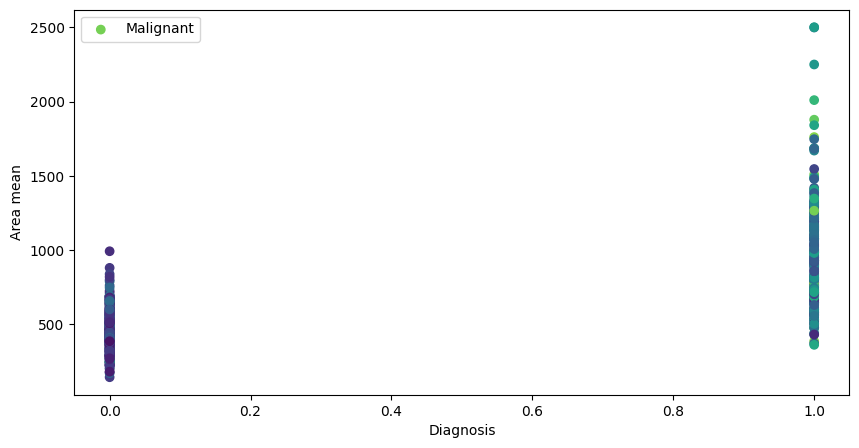

In [149]:
# scatter plot of diagnosis vs area_mean and compactness_mean
plt.figure(figsize=(10,5))
plt.scatter(dataset['diagnosis'], dataset['area_mean'], c=dataset['compactness_mean'])
plt.xlabel('Diagnosis')
plt.ylabel('Area mean')
plt.legend(['Malignant', 'Benign'])
plt.show()

### Naive Bayes Classifier

In [150]:
# applying naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9035087719298246


In [151]:
# applying decision tree with optimal hyperparameters
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, min_samples_split=5)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9649122807017544
